In [1]:
ls data


08-17-29.jpg  08-22-41.jpg  08-27-52.jpg


In [2]:
# Import Libraries 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.image


import cv2
import os
import PIL
from PIL import Image 
from glob import glob
import numpy as np
%matplotlib inline

In [3]:
dir = os.path.join("data", "*.jpg")
file_list = [file for file in glob(dir)]
print(file_list)

['data/08-22-41.jpg', 'data/08-17-29.jpg', 'data/08-27-52.jpg']


In [5]:
file_list.sort(key=lambda file: file.split('/')[1].split('-')[0:2])

In [15]:
file_list

['data/08-17-29.jpg', 'data/08-22-41.jpg', 'data/08-27-52.jpg']

In [6]:
dir = os.path.join("output-images", "*.jpg")
filled_list = [file for file in glob(dir)]
print(filled_list)

['output-images/filled-08-22-41.jpg', 'output-images/filled-08-27-52.jpg', 'output-images/filled-08-17-29.jpg']


In [7]:
filled_list.sort(key=lambda file: file.split('filled-')[1].split('-')[0:2])

In [8]:
filled_list

['output-images/filled-08-17-29.jpg',
 'output-images/filled-08-22-41.jpg',
 'output-images/filled-08-27-52.jpg']

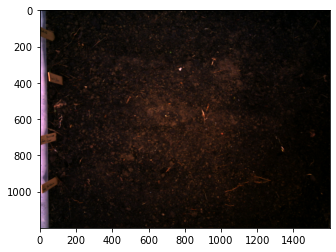

In [9]:
img_array = []
plot_array = []
for filename in file_list:
    img = plt.imread(filename)
    img_array.append(img)
    
    imgplot = plt.imshow(img)
    plot_array.append([imgplot])

In [10]:
output_array = []
for filename in filled_list:
    output_img = plt.imread(filename)
    output_array.append(output_img)
    

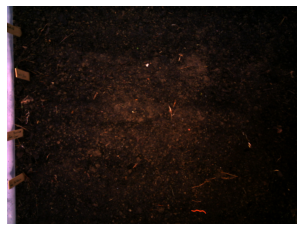

In [11]:

fig, ax = plt.subplots()
im = ax.imshow(output_array[0])


ax.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

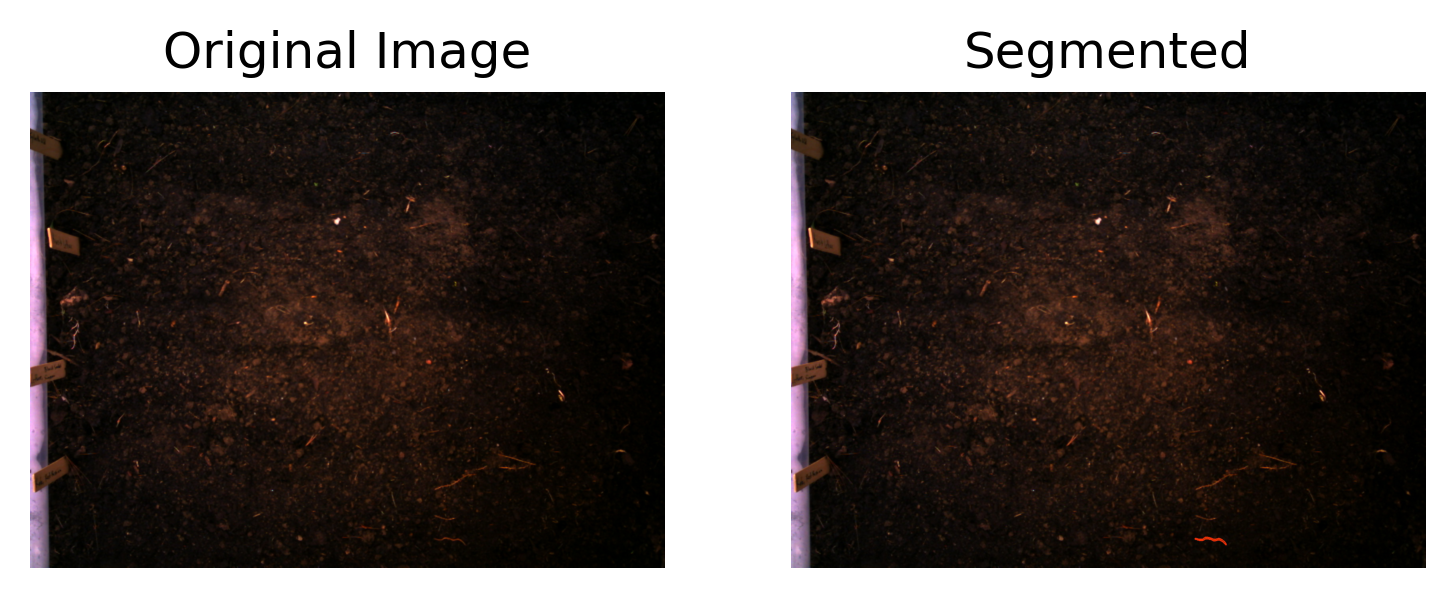

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300)
ax1.axis('off')
ax2.axis('off')

ax1.imshow(img_array[0])
ax1.set_title('Original Image')
ax2.imshow(output_array[0])
ax2.set_title('Segmented')
plt.show

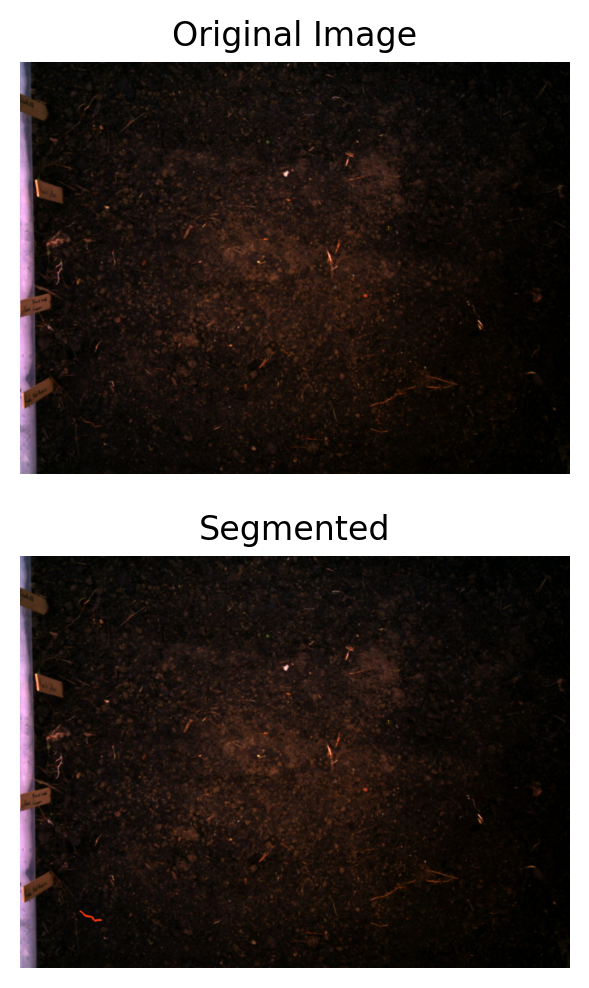

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6),dpi=200)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original Image')
ax2.set_title('Segmented')

original = [ax1.imshow(img_array[0])]
segmented = [ax2.imshow(output_array[0])]

#initialization of animation, plot array of zeros 
def init():
    return original
    return segmented

def animate(i):
    original = [ax1.imshow(img_array[i])]
    segmented = [ax2.imshow(output_array[i])]
    
    return original
    return segmented


frame_max=len(img_array)
anim = animation.FuncAnimation(fig, animate, init_func=init, repeat = True,
                               frames=range(0,frame_max), interval=1000, blit=True, repeat_delay=1000)

anim.save('test.gif')
plt.show()

In [ ]:
import cv2
import numpy as np
import os

image_folder = 'data'
video_file = 'vid.avi'
image_size = (1600, 1200)
fps = 1

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()
file_list.sort()
out = cv2.VideoWriter(video_file, cv2.VideoWriter_fourcc(*'MJPG'), fps, image_size)

img_array = []
for filename in file_list:
    img = cv2.imread(filename)
    img_array.append(img)
    out.write(img)

out.release()


In [ ]:
img_list = []
cv2_img_list= []
im_list = []
for file in file_list:
    img = Image.open(file)
    img_list.append(img)
    cv2_img = cv2.imread(file)
    cv2_img_list.append(cv2_img)
    imgplot = plt.imshow(img,animated=True)
    im_list.append([imgplot])
print(im_list)

In [ ]:
im_list[0]

In [ ]:

fig= plt.figure(dpi=200)

ani = animation.ArtistAnimation(fig, im_list)
writer = animation.FFMpegWriter(fps=2)
ani.save('file.gif',writer=writer)

plt.show()



In [ ]:
from matplotlib import animation  
import matplotlib.image as mgimg
import numpy as np

#set up the figure
fig = plt.figure()
ax = plt.gca()

#initialization of animation, plot array of zeros 
def init():
    imobj.set_data(np.zeros((100, 100)))

    return  imobj,

def animate(i):
    ## Read in picture
    fname = img_array[i] 

    ## here I use [-1::-1], to invert the array
    # IOtherwise it plots up-side down
    img = mgimg.imread(fname)[-1::-1]
    imobj.set_data(img)

    return  imobj,


## create an AxesImage object
imobj = ax.imshow( np.zeros((100, 100)), origin='lower', alpha=1.0, zorder=1, aspect=1 )


anim = animation.FuncAnimation(fig, animate, init_func=init, repeat = True,
                               frames=range(1,4), interval=200, blit=True, repeat_delay=1000)

anim.save()
plt.show()

In [ ]:
outfile = 'output-images/' + 'base-anim.gif'
print(outfile)
img_list[0].save(outfile, save_all=True, append_images=img_list[1:], duration=2000, loop=1)


In [ ]:
cv2.imshow('image',cv2_img_list)

In [ ]:
img_array = []
for file in file_list:
    img = Image.open(file)
    img_array.append(img)
    print(file)
img_array

In [ ]:

# Create the frames

# Save into a GIF file that loops forever
img_array[0].save('test.gif', format='GIF',
               append_images=img_array[1:],
               save_all=True,
               duration=180, loop=0)


In [ ]:
%%HTML
<video controls>
  <source src="01.avi">
</video>

In [ ]:


from IPython.display import Video

#Video(‘https://archive.org/download/Sita_Sings_the_Blues/Sita_Sings_the_Blues_small.mp4’)
#Video(‘path/to/video.mp4’)
Video('01.mp4', embed=True)
#Video(b’raw-videodata’, embed=True)